# Linear Regression

<center>
<img src="https://user-images.githubusercontent.com/6872080/106463522-8d4c6280-6465-11eb-901a-9d8edcfb4ecb.png" width="60%">
</center>


### Tad bit of History
`Francis Galton` in his [paper](http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf) introduced the idea of `Regression`. He first worked with plant seeds and then with human heights data to understand `inheritance`. 

Later on he would go on to suggest that society should promote the marriage of what he felt were the fittest individuals by providing monetary incentives. Sounds kind of icky ?

Shortly thereafter, many intellectuals and political leaders 
(e.g., 
- Alexander Graham Bell, 
- Winston Churchill, 
- John Maynard Keynes, 
- and Woodrow Wilson) 

accepted the notion that modern societies, as a matter of policy, should promote the improvement of the human race through various forms of governmental intervention. While initially this desire was manifested as the promotion of selective breeding, it ultimately contributed to the intellectual underpinnings of 
- state-sponsored discrimination, 
- forced sterilization, 
- and genocide.

And these kind of thoughts became mainstream and promoted as 'scientific'

<center>
<img src="https://user-images.githubusercontent.com/6872080/106465321-d00f3a00-6467-11eb-9553-9968a1fee51a.png" width="40%">
</center>


- Henry F. Osborn, then president of the American Museum of Natural History in New York

[source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2757926/)

# Back to Science

Okay so that was rough. But the underpinning of all that `Galton` proposed was `regression` to the mean. 
He was dealing with data which had heights of kids and their parents and he was looking to see if there any discernible patterns. And the pattern he found, he called it the `law of regresion`.

To quote `Galton's paper`

![image](https://user-images.githubusercontent.com/6872080/106482723-ba0b7480-647b-11eb-917f-0d5efc833e68.png)

Mathematically 

let `mean` height of the population be $\bar{H}$,

let a given child's height be $c_i$ 

and mid-parentage being defined as 

$$ p_i = \frac{(father's height +  adjustmentfactor *mother's height)}{2} $$

where adjustment factor is a constant

then what galton observed is

$$ c_i =  \frac{2}{3}*p_i + \frac{1}{3}*\bar{H}  $$

What you see above is that a child's height is a function of the parent's height , thats because of regression to the mean. And that too not any function but a `linear` function. 

### What's a linear function ?

A linear function is any function $f$ such that

$$ f(x+y) = f(x) + f(y) $$

and 

$$ f(\alpha x) = \alpha*f(x) $$ where $ \alpha $ is some constant.


### But how to find this function ?

Now suppose we want to repeat what Galton did. Suppose, given both parents' and children's heights we want to find a rule that will allow us to predict children's height given only parent's heights. This is the kind of problem that regression helps us solve. 


To generalize what `Galton` found. Let our dependent variable be $y$ which is a function of a random variable $x$ and we assume that this relationship is linear. Then $ith$ observation is given by $(x_i , y_i) $ and related as follows


$$ y_i = W^Tx_i + b + \epsilon $$
or

$$ \epsilon = y_i - ( W^Tx_i + b) $$

usually we can subsume $b$ by adding a constant feature to $x$ and therefore the quation can be simplied to 

\begin{equation}
\epsilon = y_i - W^Tx_i
\tag{1}
\end{equation}

where $W$ is the weight matrix and signifies how much do each of the features in $X$ contribute to $y$

## Noise
$\epsilon$ is represents the noise in our data or in the random process itself and usually assumed to be normally distributed with a `mean` of 0 and some fixed standard deviaition $\sigma$. 

$$ \epsilon \in \mathcal{N(0 , \sigma^2)}$$

This comes from theory of errors

<center>
<img src="https://user-images.githubusercontent.com/6872080/106494758-cf3ad000-6488-11eb-9ec8-efcbefc2b896.png"/ width="50%">
</center>

[source](https://sci-hub.se/https://doi.org/10.1103/RevModPhys.6.119)

Which means that

$$ P(\epsilon) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\epsilon^2}{\sigma^2}} $$

but from (1) we can substitute the value for $\epsilon$ and get

\begin{equation}
P(y_i) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y_i-W^Tx_i)^2}{\sigma^2}}
\tag{2}
\end{equation}

# Derivation
### Maximum Likelihood Estimation

Now will use Maximum likelihood Estimation(MLE) to find the weights. If you don't know MLE please refer to [this](https://github.com/abhijeetdtu/ml-scratch/blob/master/notebooks/README.md)

Basically MLE tries to maximize the probability of seeing the entire dataset/sample given a distribution and thereby finding the parameters we need.

Probability of one data point is given by $(2)$ and since each data point in our dataset/sample is $i.i.d$ (independently and identically drawn) from same distribution, therefore probability of observing the dataset will be a simple product of the probabilities

$$ likelihood(Dataset) = \prod_i P(y_i) $$

from $(2)$
$$ likelihood(Dataset) = \prod_i  \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y_i-W^Tx_i)^2}{\sigma^2}} $$

Now we want to maximize the likelihood of seeing the dataset. To do that we need to adjust the contributions/ weights of each of the feature in our data i.e the $W$ matrix and find $W$ that maximize the likelihood(dataset)

$$ argmax_W \ likelihood(Dataset) = argmax_W \ \prod_i  \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y_i-W^Tx_i)^2}{\sigma^2}} $$

we can apply log to both sides as it is a monotonic function and doesn't change the solution to the equation but does make our calculations easier.

$R.H.S$
$$ = argmax_W \sum_i \ log(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y_i-W^Tx_i)^2}{\sigma^2}}) $$

$$ = argmax_W \sum_i (\ log(\frac{1}{\sqrt{2\pi}\sigma}) + log(e^{-\frac{(y_i-W^Tx_i)^2}{\sigma^2}}) )$$

\begin{equation} 
= argmax_W \sum_i (\ constant  + -\frac{(y_i-W^Tx_i)^2}{\sigma^2}) 
\end{equation}

Since constant does not depend on $W$ we can remove it

$$ = argmax_W \sum_i  -\frac{(y_i-W^Tx_i)^2}{\sigma^2} $$

Since we are finding the maxima and $\sigma$ does not depend on $W$ we can move it outside the summation.

$$ argmax_W -\frac{1}{\sigma^2} \sum_i (y_i-W^Tx_i)^2 $$

since the whole expression is negative we can remove that and change it to a minimization problem instead

$$ argmin_W \frac{1}{\sigma^2} \sum_i (y_i-W^Tx_i)^2 $$

Since we are minimizing and $\sigma$ does not depend on $W$ we simply get rid of it.

\begin{equation}
 argmin_W \sum_i (y_i-W^Tx_i)^2
\tag{3}
\end{equation}

SO....

this turns out to be just a problem of minizing the residuals in the sample by choosing appropriate $W$

To solve the equation in closed form we can differentiate the equation with respect to $W$ and set it to 0

Euqation $(3)$ can be written in Matrix form as

$$ (Y-W^TX)^T(Y-W^TX) $$

$$ = (Y^T-X^TW)(Y-W^TX) $$
$$ = Y^TY - 2X^TWY + X^TWW^TX$$

Now differentiating this with respect to W and equating to 0

$$  - 2X^TY + 2X^TXW = 0$$
$$   X^TXW =  X^TY $$

\begin{equation}
  W =  (X^TX)^{-1}X^TY
  \tag{4}
\end{equation}

Therefore we can find weights in closed form that will give us MLE estimates. 

BUT the problem is 
1. since each $X$ is a $n\ X \ d$ matrix, $(X^TX)$ will be $O(d^2)$ where $d$ is the number of features/dimensions and $n$ is the number of observations and therefore the memory requirements grows quadratically with the number of dimensions.

2. Also the computation of $ (X^TX)^{-1}X$ will be $O(d^3)$ in complexity 

Therefore it becomes prohibtive as the number of dimensions increase in the dataset.

Therefore the solutions is usually found using `Gradient Descent`. If you not familiar with it or want a quick refreseher. [Here](https://github.com/abhijeetdtu/ml-scratch/blob/master/notebooks/README.md) it is.






# Implementation

Now let's get rockin. 

First we generate a synthetic dataset. Suppose this dataset  includes heights of parent (X) and kids (y). 

Now since we are generating the dataset we know beforehand the relationship. But we will learn it using Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *

In [2]:
X = np.random.normal(68,1.7 , (10000,1)) #Mean being 68 inches and with a standard deviation of around 1.7 inches
y = np.sum((2/3)*X , 1) + (1/3)*68 + np.random.normal(0,0.3 , 10000)

In [3]:
X

array([[69.02797254],
       [68.28096453],
       [64.67846087],
       ...,
       [65.388644  ],
       [67.103319  ],
       [70.085568  ]])

In [4]:
y

array([68.58453173, 68.03647801, 65.23390636, ..., 66.64230727,
       67.38334539, 69.34101619])

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 58'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


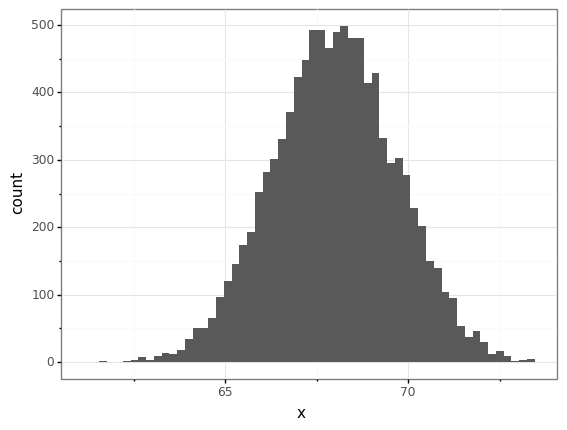

<ggplot: (8758925413668)>

In [5]:
(
    ggplot(pd.DataFrame({"x" : X[:,0] , "y":y}) , aes(x="x"))
    + geom_histogram()
    + theme_bw()
)

Okay so now we have a bunch of heights of both parents ( mid-parent) and their children. Let's code up `Gradient Descent` class that will be a helper to our `LinearRegression` class.

In [6]:
class GradientDescent:

  def __init__(self ,derivative_fn , learning_rate = 1e-5):
    self.derivative_fn = derivative_fn
    self.learning_rate = learning_rate

  def fit(self,X,y):

    weights = np.zeros(X.shape[1])

    while True:
       gradient = self.derivative_fn(X,y,weights)
       #print(gradient)
       weights = weights - self.learning_rate*gradient

       if np.linalg.norm(gradient , 2) < 0.1:
         break
    
    return weights


Now let's code up our linear regression class that uses the GradientDescent Class.

Derivative of the $liklihood(Datast)$ function comes from differentiating equation $(3)$ with respect to $W$
and it comes out to be 

$$ \frac{\partial{LL}}{\partial{W}} = -\sum_i 2x_i(y_i - W^Txi)$$

In [7]:
class LinearRegression:
  
  def _derivative(self,X,y,weights):
    residuals = (y-np.dot(X , weights)).reshape((-1,1))
    grad= np.sum(-2*np.dot(X.T , residuals) , 1)
    #print(grad.shape)
    return grad

  def fit(self,X,y):
    X = X.copy()
    X = np.hstack((X , np.ones((X.shape[0],1)))) # Subsuming bias term
    #print(X.shape)
    gd = GradientDescent(self._derivative , 1e-8)
    self.weights = gd.fit(X,y)
  
  def predict(self,X):
    X = np.hstack((X , np.ones((X.shape[0],1))))
    return np.dot(X , self.weights)


In [8]:
lr = LinearRegression()
x_scaled = (X-X.mean()) / X.std()
lr.fit(x_scaled,y)

In [9]:
lr.weights

array([ 1.13185684, 67.99111541])

## WAIT!

The linear regression we just ran found us the equation

$$ c_i =  1.11*p_i + 68  $$

but wasn't it supposed to be 

$$ c_i =  \frac{2}{3}*p_i + \frac{1}{3}*\bar{H}  $$

Well what has happend is that it's the same relationship but on different scale. This is because we `scaled` and `centered` or `standardized` our `X` values before we ran linear regression on it. This is a good practice when using Gradient Based methods because it helps avoid gradient explosion and vanishing problems.

the 1.11 above is really just (2/3) in the new scale. To get the original value we can scale back using the standard deviation of X.

In [10]:
1.11 / X.std()

0.6533608045770013

Let's visualize the line found

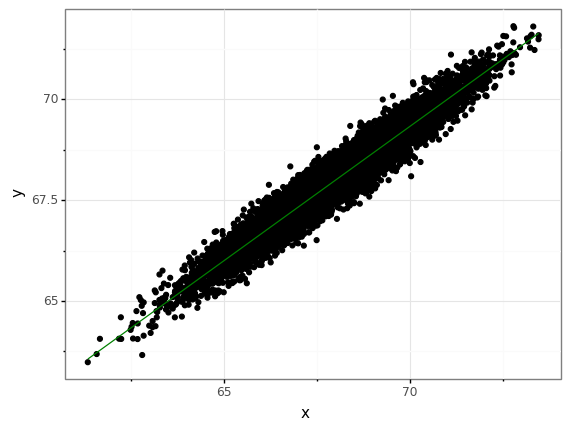

<ggplot: (8758907208943)>

In [21]:
(
    ggplot(pd.DataFrame({"x" : X[:,0] , "y":y}) , aes(x="x" , y="y"))
    + geom_point()
    + annotate(geom="segment" 
               , x=np.min(X) 
               , y=lr.predict(np.min(x_scaled).reshape(-1,1))[0]
               , xend=np.max(X)
               , yend=lr.predict(np.max(x_scaled).reshape(-1,1))[0] , color="green")
    + theme_bw()
)

Seems like a perfect fit! 

Let's also look at `Mean Squared Error` to mathematically evaluate our fit for the data

In [296]:
from sklearn.metrics import mean_squared_error

In [297]:
mean_squared_error(y , lr.predict(x_scaled))

2.4980812857197036e-13

We generate a test dataset and see how our model performs on this unseen data

In [298]:
x_test = np.random.normal(68,1.7 , (10000,1))
y_test = np.sum((2/3)*x_test , 1) + (1/3)*68

x_test = (x_test - x_test.mean())/ x_test.std()
mean_squared_error(y_test , lr.predict(x_test))

0.00041160444477084264

We get a pretty low error! Great! 
Also to note is that `Test set` errors are greater than the `Train Set` error.